# BATCH: PGP DSE - JAN 2022

# Loan Default Analysis

* EDA

# Team members :-     
                                    * Hasitha Vaddi 
                                    * Sree Ganesha Chellappa 
                                    * Faishal Sharif 
                                    * Nikhil Nivalagi 
                                    * Ashish Shukla 

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv data 
df = pd.read_csv(r'C:\Users\Ganesh\Desktop\capstone\train_indessa.csv')
df.head()
#The data contains 532428 rows and 45 columns.

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


## Description of dataset 

#### About the data set (Loan Default Data)


**member_id:** unique ID assigned to each member

**loan_amnt:** loan amount ($) applied by the member 

**funded_amnt:** loan amount ($) sanctioned by the bank

**funded_amnt_inv:** Whether the patient is a smoker now: Yes(1) or No(0)

**term:** Average number of cigarettes smoked by patient per day

**batch_enrolled:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**int_rate:** If the patient has a history of heart stroke: Yes(1) or No(0)

**grade:** If the patient has a history of hypertension: Yes(1) or No(0)

**sub_grade:**  If the patient has a diabetes: Yes(1) or No(0)

**emp_title:** Average cholesterol levels in mg/dL

**emp_length:** Average systolic blood pressure of patient

**home_ownership:** Average diastolic blood pressure of patient

**annual_inc:** BMI of patient

**verification_status:** Avergae heartrate of patient

**pymnt_plan:** Average blood glucose levels of patient

**desc:** Does the patient have cardiovascular disease: Yes(1) or No(0)

**purpose:** purpose of loan

**title:** loan title provided by member

**zip_code:** first three digits of area zipcode of member

**addr_state:** living state of member

**dti:** ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income

**delinq_2yrs:** number of 30+ days delinquency in past 2 years

**inq_last_6mths:** number of inquiries in last 6 months

**mths_since_last_delinq:** number of months since last delinq

**mths_since_last_record:** number of months since last public record

**open_acc:** number of open credit line in member's credit line

**pub_rec:** number of derogatory public records

**revol_bal:** total credit revolving balance

**revol_util:** amount of credit a member is using relative to revol_bal

**total_acc:** total number of credit lines available in members credit line

**initial_list_status:** unique listing status of the loan - W(Waiting), F(Forwarded)

**total_rec_int:** interest received till date

**total_rec_late_fee:** Late fee received till date

**recoveries:** post charge off gross recovery

**collection_recovery_fee:** post charge off collection fee

**collections_12_mths_ex_med:** number of collections in last 12 months excluding medical collections

**mths_since_last_major_derog:** months since most recent 90 day or worse rating

**application_type:** indicates when the member is an individual or joint

**verification_status_joint:** indicates if the joint members income was verified by the bank

**last_week_pay:** indicates how long (in weeks) a member has paid EMI after batch enrolled

**acc_now_delinq:** number of accounts on which the member is delinquent

**tot_coll_amt:** total collection amount ever owed

**tot_cur_bal:** total current balance of all accounts

**total_rev_hi_lim:** total revolving credit limit

**loan_status:** status of loan amount, 1 = Defaulter, 0 = Non Defaulters

# Univariate Analysis

## Categorical Variables 

##  Column_name: Term

we have done the univariate analysis of each features as follows:

In [3]:
# Check the "term (in Months)" offered by the bank
df['term'].value_counts()

36 months    372793
60 months    159635
Name: term, dtype: int64

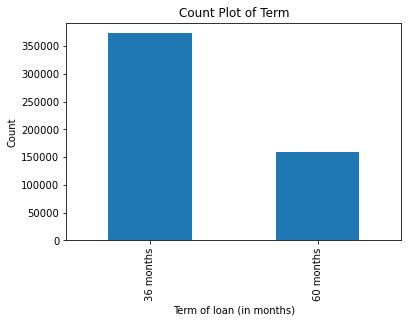

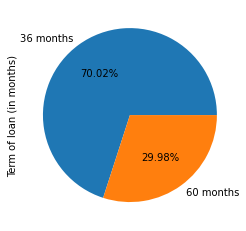

In [4]:
#Count plot of the term 

df['term'].value_counts().plot(kind='bar');
plt.xlabel("Term of loan (in months)")
plt.ylabel("Count")
plt.title('Count Plot of Term')
plt.show()

df['term'].value_counts().plot(kind='pie',autopct='%1.2f%%');
plt.ylabel("Term of loan (in months)")
plt.show()


Inferences:- From the below plot we can conclude that 70% of customers need the loan fo the duration of 36 months and remaininng 30% of customers for the 60 months

## Column name: Grade

Loan grading is used to assign a quality score to a loan based on the credit history of the borrower, quality of the collateral, and the likelihood of the repayment

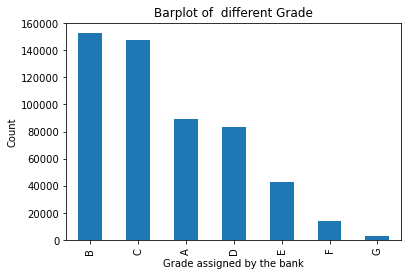

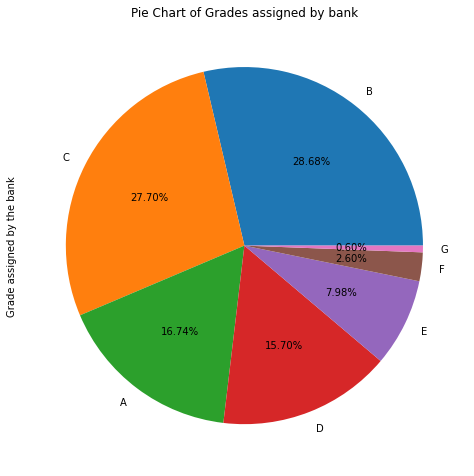

In [6]:
df['grade'].value_counts().plot(kind='bar');
plt.xlabel("Grade assigned by the bank")
plt.ylabel("Count")
plt.title('Barplot of  different Grade')
plt.show()

plt.figure(figsize=(8,10))
df['grade'].value_counts().plot(kind='pie',autopct='%1.2f%%');
plt.ylabel("Grade assigned by the bank")
plt.title('Pie Chart of Grades assigned by bank')
plt.show()


Inferences:- 
From the below plot we can conclude that Highest no. of customers belong from Grade B and lowest no. of customers from Grade G.
No. of customers from Grade A and D is approximately same.

## Column name: Sub-Grade

Loans are classified by grade (A through G) and subgrade (1 through 5). These groups correspond to the given interest rates, which are determined by the perceived risk of the borrower. 

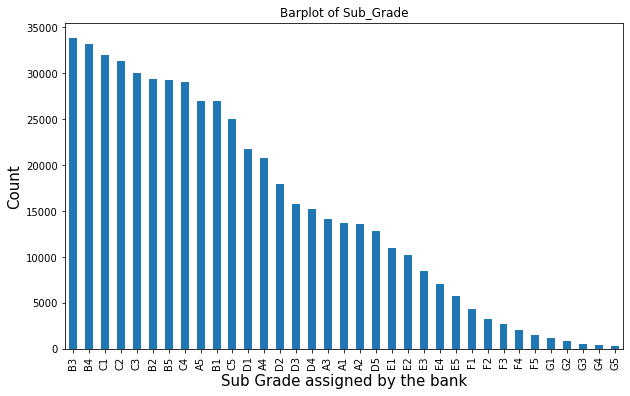

In [8]:
plt.figure(figsize=(10,6))
df['sub_grade'].value_counts().plot(kind='bar');
plt.xlabel("Sub Grade assigned by the bank" ,fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.title('Barplot of Sub_Grade')
plt.show()


Inferences:- From the below plot, we can observe that the maximum members are assigned in Sub Grade B3 and lowest members are assigned in Sub Grade G5. 
More than 30000 members are assigned in these 5 Sub grade B3, B4, C1, C2,C3.

## Column name: home_ownership

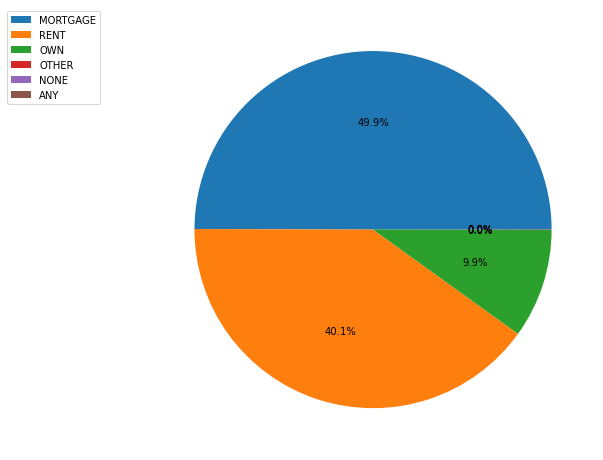

In [7]:
label = df['home_ownership'].value_counts()
plt.figure(figsize =(8,10))
plt.pie(label.values,autopct='%1.1f%%')
plt.legend(label.index,loc='best',bbox_to_anchor=(-0.1, 1.))
plt.show()


Inferences:- Mortgage covers about 50% of the total home ownership status of the data mortgage , rent,own totaally comprise of the 99.99% home ownership status of the total employees.

## Column name: verification_status

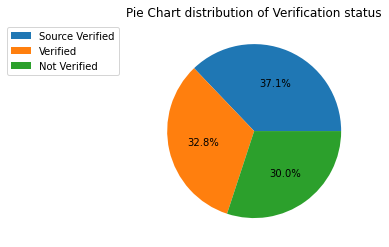

In [8]:
vs = df['verification_status'].value_counts()
plt.pie(vs.values,autopct='%1.1f%%')
plt.legend(vs.index,loc='best',bbox_to_anchor=(-0.1, 1.))
plt.title('Pie Chart distribution of Verification status')
plt.show()


Inferences:-
All the verification status are somewhat contributing significantly.
Verification status of employees are majorily carried by verified source category.

## Column name: pymnt_plan

Text(0.5, 1.0, 'Count Plot of payment plan')

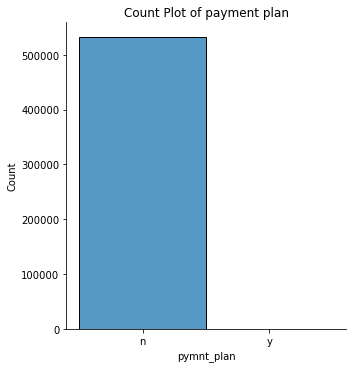

In [9]:
sns.displot(data= df['pymnt_plan'])
plt.title('Count Plot of payment plan')
plt.show()

Inferences:- Almost all the employees dont have a payment plan.

## Column name:  purpose

<Figure size 576x288 with 0 Axes>

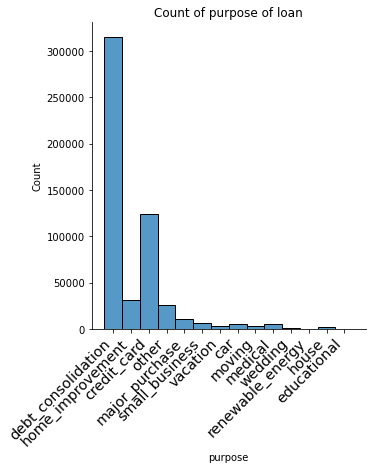

In [10]:
plt.figure(figsize=(8,4))
ax = sns.displot(data = df['purpose'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('Count of purpose of loan')
plt.show()


Inferences:- 
Out of 500000 employees more than 300000 (60%)employees have  purpose of loan as 'debt_consolidation'.
More than 1 lakh employees have put their purpose of loan as 'credit card'.

## Column name: initial_list_status

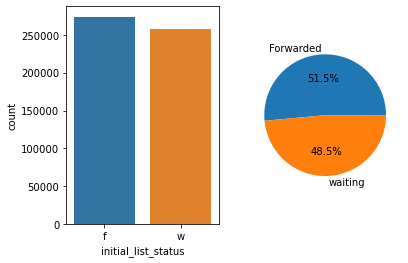

In [11]:
plt.subplot(1,2,1)

sns.countplot(df['initial_list_status']) 
plt.subplot(1,2,2)
plt.pie(df['initial_list_status'].value_counts(),autopct= '%1.1f%%',labels=['Forwarded','waiting']);
plt.show()

Inferences:- 
Unique listing status of the loan - W(Waiting), F(Forwarded)
Forwarded loan status() (274018)is slightly greater than waiting status()(258410)
Forwarded loan status() occupies 51.5 percent of the total data count
Waiting loan status() occupies 48.5 percent of the total data count

## Column name: application_type

INDIVIDUAL    532123
JOINT            305
Name: application_type, dtype: int64


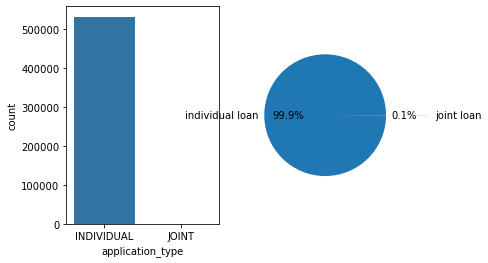

In [12]:
plt.subplot(1,2,1)

sns.countplot(df['application_type'])
print(df['application_type'].value_counts())

plt.subplot(1,2,2)
plt.pie(df['application_type'].value_counts(),autopct= '%1.1f%%',explode=(0, 0.7), labels=['individual loan', 'joint loan']);


Inferences:- 
The individual loan taker has a majority count of 532123 and joint loan takers have a count of only 305.
This joint loan takers hold a minority of 0.1 percent and the rest is 99.9 percent

## Column name: verification_status_joint

Not Verified       170
Verified           102
Source Verified     33
Name: verification_status_joint, dtype: int64


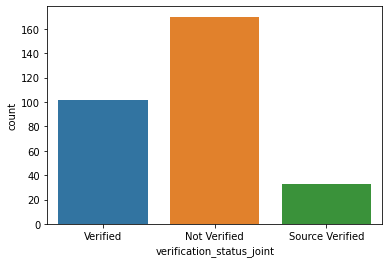

In [13]:
sns.countplot(df['verification_status_joint'])
print(df['verification_status_joint'].value_counts())

Inferences:- From the above plot, we can say that maximum are not verified

## Column name: last_week_pay

13th week     30333
9th week      28626
26th week     27475
22th week     26000
4th week      25704
              ...  
300th week        1
278th week        1
274th week        1
269th week        1
304th week        1
Name: last_week_pay, Length: 98, dtype: int64


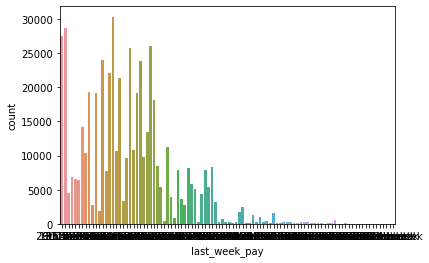

In [14]:
sns.countplot(df['last_week_pay'])
print(df['last_week_pay'].value_counts())

## Column name: loan_status

0    406601
1    125827
Name: loan_status, dtype: int64


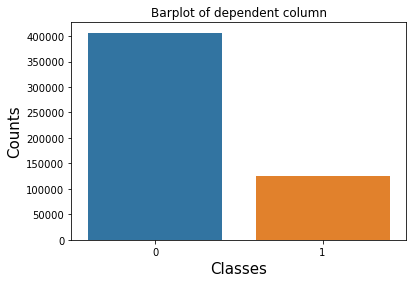

In [10]:
sns.countplot(df['loan_status'])
plt.xlabel("Classes" ,fontsize = 15)
plt.ylabel("Counts",fontsize = 15)
plt.title('Barplot of dependent column')
print(df['loan_status'].value_counts()) 


Inferences:- The number of non defaulters are three times as much as the number of defaulters 

## Column name: emp_title

In [16]:
df['emp_title'].describe()

count      501595
unique     190124
top       Teacher
freq         8280
Name: emp_title, dtype: object

Inferences:- 
Many unique profession people have applied for loan
Top professsion employee are teachers with frequency of 8thousand plus

## Column name: desc

In [17]:
percent = (df['desc'].isnull().sum()/len(df['desc']))*100
percent

85.80108484151849

Inferences:- 
85% of the loan description provided by the members are null.
We can drop such column of such little significance.

## Column name: title
* This attribute is about the loan title given by the members.

In [18]:
df.title.describe()

count                 532338
unique                 39693
top       Debt consolidation
freq                  248967
Name: title, dtype: object

Inferences:- 
We can observe that almost 40000 unique records are found in this column.
"Debt Consolation" is the loan title provided by maximum members.
Almost 2.48lakh members opted for Debt Consoidation as their loan title.

# Numerical Variables 

## Column name: loan_amnt

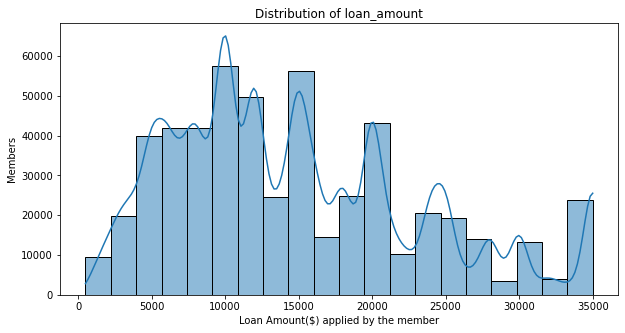

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x='loan_amnt', kde=True ,bins=20);
plt.xlabel("Loan Amount($) applied by the member")
plt.ylabel("Members")
plt.title('Distribution of loan_amount')
plt.show()


Inferences:- 
From the above plot, we can observe that the maximum loan amount applied by the member is 35000$ and Approx 58000 members are applied the loan amount of 10000$ and similarly Approx 56000 members are applied the loan amount of 15000$

## Column name: funded_amnt

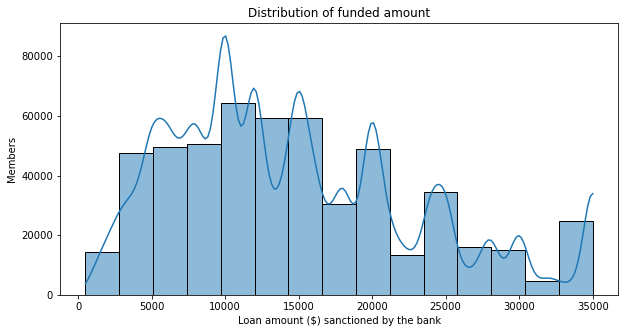

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x='funded_amnt', kde=True ,bins=15);
plt.xlabel("Loan amount ($) sanctioned by the bank")
plt.ylabel("Members")
plt.title('Distribution of funded amount')
plt.show()


Inferences:- 
From the above plot, we can observe that the maximum loan amount sanctioned by the bank is 35000$ and bank have also sanctioned the loan amount of 10000$ more than 61000 members.

## Column name: funded_amnt_inv

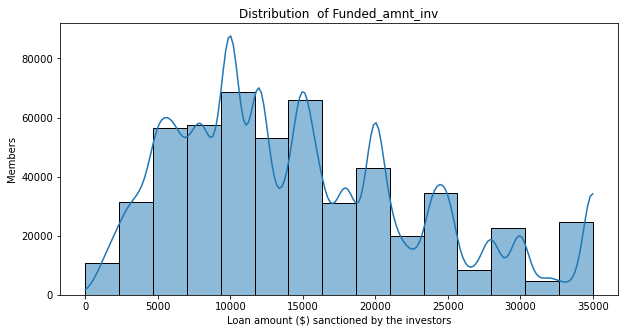

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data = df, x='funded_amnt_inv' , kde=True,bins=15)
plt.xlabel("Loan amount ($) sanctioned by the investors")
plt.ylabel("Members")
plt.title('Distribution  of Funded_amnt_inv')
plt.show()

Inferences:- 
From the above plot, we can observe that the maximum loan amount sanctioned by the investors is 35000$ and investors have also sanctioned the loan amount of 10000$ more than 68000 members.

## Column name: int_rate

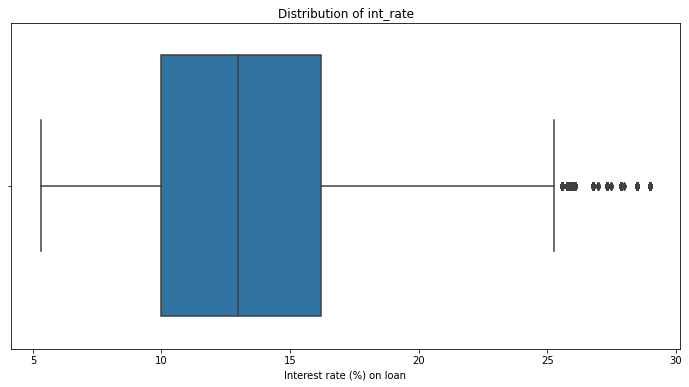

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='int_rate');
plt.xlabel("Interest rate (%) on loan")

plt.title('Distribution of int_rate')
plt.show()


Inferences:- 
From the above plot, we can observe that the maximum interest rate given on loan is around 26% and minimum interest rate given on loan is 6%. Approximately 80,000 members are paying the interest around 13%.

## Column name: member_id

In [23]:
len(df.member_id.unique())

532428

Inferences:- The member_id  counts are unique for each member.

## Column name: batch_enrolled

Inferences:- 
From the data, we can observe that members are alloted the batch based on the software structure of the bank and This particular column is the independent column of this dataset.

## Column name: emp_length

In [24]:
# Here the employee length column was having many meaningless and reduddant data. So data cleaning was done before visualisation.

df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')
df['emp_length'].describe()

count    505537.000000
mean          6.010559
std           3.665448
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

In [25]:
df['emp_length'].value_counts().sum()

505537

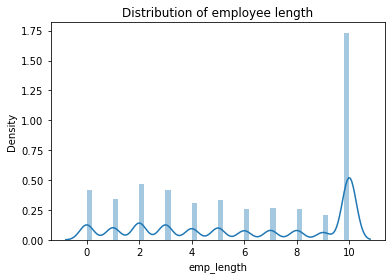

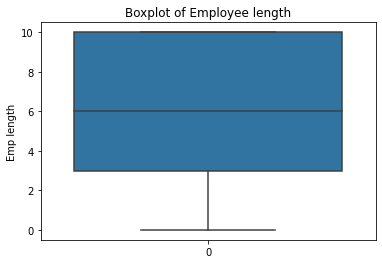

In [26]:
sns.distplot(a=df['emp_length'])
plt.title('Distribution of employee length')
plt.show()

sns.boxplot(data=df['emp_length'])
plt.title('Boxplot of Employee length')
plt.ylabel('Emp length')
plt.show()


Inferences:- 
Majority of the employees have completed the tenure of 10years
Significant employees tenure are also less than 1 year
Mean employees length are in the range of 6 years
Majority employees tenure length are in the range of 3 years and 10 yrs.
Data has skewness of -0.24 indicating data is left skewed.
Kutosis of data is -1.4 indicating data distribution is flat and not peaked.

## Column name: annual_inc

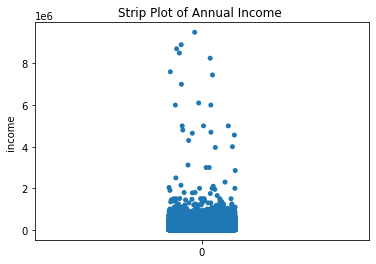

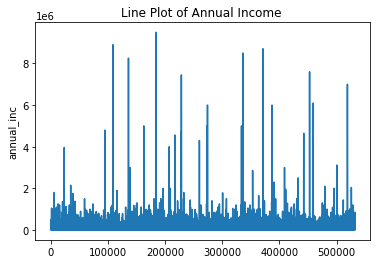

count    5.324250e+05
mean     7.502984e+04
std      6.519985e+04
min      1.200000e+03
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64


In [27]:
sns.stripplot(data=df.annual_inc)
plt.title('Strip Plot of Annual Income ')
plt.ylabel('income ')
plt.show()

sns.lineplot(data=df.annual_inc)
plt.title('Line Plot of Annual Income ')
plt.show()
print(df.annual_inc.describe())


Inferences:- 
Mean annual income is approximately 75000
Max annual income is 9,500,000 
Range  of the annual incomes lies between 45000 to 90000
Outliers present beyond 2,000,000 

## Column name : DTI 

* It is the ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income

Text(0.5, 1.0, 'Distribution of DTI')

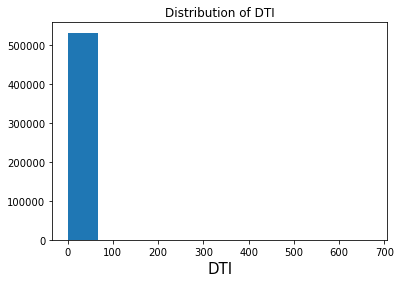

In [5]:
plt.hist(df.dti)
plt.xlabel('DTI' , fontsize = 15)
plt.title('Distribution of DTI')
# Right Skwed
# Outliers

Inferences:- 
Lenders typically say the ideal front-end ratio should be no more than 28 percent, and the back-end ratio, including all expenses, should be 36 percent or lower
Lenders prefer borrowers with a lower DTI because that indicates less risk that you'll default on your loan.

##  Column name: delinq_2yrs (number of 30+ days delinquency in past 2 years)

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Density'>

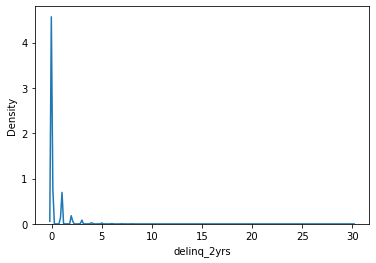

In [63]:
# delinquency :- minor crime
# if the payments are missed on payment in a single month across various credit accounts.

sns.kdeplot(df['delinq_2yrs'])

Inferences:- From the above plot, we can not find any clear plot between them.

## Column name: inq_last_6mths (number of inquiries in last 6 months)

In [64]:
# How many inquiries is too many in 6 months?
# For many lenders, six inquiries are too many to be approved for a loan or bank card. 
# Even if you have multiple hard inquiries on your report in a short period of time,
# you may be spared negative consequences if you are shopping for a specific type of loan.

<AxesSubplot:xlabel='inq_last_6mths', ylabel='Density'>

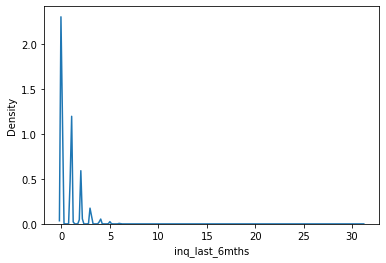

In [65]:
sns.kdeplot(df.inq_last_6mths)


Inferences:- From the above plot, we can not find any clear plot between them.

## Column name:  mths_since_last_delinq
* Number of months since last delinq


<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Density'>

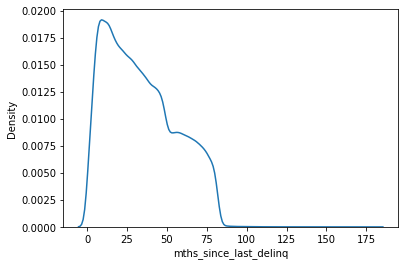

In [66]:
sns.kdeplot(df.mths_since_last_delinq)


Inferences:-
Few outliers and a lots of null values and this outliers dont have influence in the loan status

## Column name: mths_since_last_record
* Number of months since last public record

In [67]:
# Public records may indicate you stopped paying your bills

In [68]:
df.mths_since_last_record.isnull().sum()/len(df) * 100
 

84.57575484384743

Inferences:- From the above plot, we can observe that this column have around 85% null values.

## Column name: open_acc
* Number of open credit line in member's credit line

Text(0.5, 1.0, 'Distribution of open account')

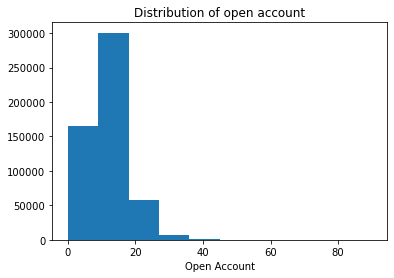

In [14]:
plt.hist(df.open_acc)
plt.xlabel('Open Account' , fontsize = 10)
plt.title('Distribution of open account')

Inferences:-
Open credit is a pre-approved loan between a lender and a borrower. 
It allows the borrower to make repeated withdrawals up to a certain limit and then make subsequent repayments before the payments become due
A new line of credit may improve your credit score. 
However, you should never take out an additional line of credit unless necessary.
Applying for multiple lines of credit in a short period is not advised,
and having too many lines of credit make you look risky to lenders.

## Column name: pub_rec
* Number of derogatory public records

In [71]:
# A derogatory account is one that is seriously past due.
# Most commonly, the term derogatory refers to accounts that are 60 or 90 days past due or more.
# It also includes collection accounts, charge-offs, repossessions and foreclosures

# The only type of public record information that would appear on your credit report is a bankruptcy filing.

In [72]:
df.pub_rec.value_counts()


0.0     451040
1.0      67938
2.0       8841
3.0       2692
4.0        974
5.0        424
6.0        238
7.0         97
8.0         67
9.0         23
10.0        23
11.0        16
12.0        12
13.0         7
21.0         4
16.0         3
15.0         2
28.0         1
17.0         1
20.0         1
23.0         1
49.0         1
63.0         1
14.0         1
40.0         1
18.0         1
22.0         1
86.0         1
Name: pub_rec, dtype: int64

Inferences:- Majority number of derogatory public records are 0

## Column name: revol_bal

<AxesSubplot:>

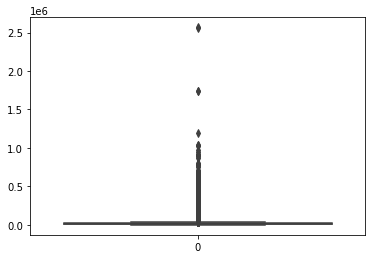

In [79]:
sns.boxplot(data=df['revol_bal']) #the data has extreme outliere of value 2.5*10^5 which affect the mean, and other outliers
#but  the majority of the data has a total credit revolving balance in the range of 0 to 40000
#the outliers can help gain insight about the delauters in future

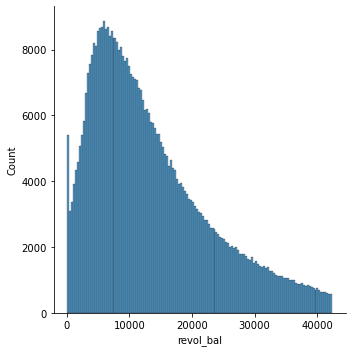

In [80]:
Q1 = df['revol_bal'].quantile(0.25)

# calculate the third quartile
Q3 = df['revol_bal'].quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1
df_new2 = df['revol_bal'][~((df['revol_bal'] < (Q1 - 1.5 * IQR)) | (df['revol_bal'] > (Q3 + 1.5 * IQR)))]
sns.displot(df_new2)


Inferences:-
The data has extreme outliere of value 2.5*10^5 which affect the mean, and other outliers
but  the majority of the data has a total credit revolving balance in the range of 0 to 40000
the data is skewed towards the right

## Column name: revol_util
* Amount of credit a member is using relative to revol_bal

In [81]:
#Revolving credit is an agreement that permits an account holder to 
#borrow money repeatedly up to a set dollar limit while repaying a portion of the current
#balance due in regular payments. Each payment, minus the interest and fees charged, replenishes 
#the amount available to the account holder.

<AxesSubplot:xlabel='revol_util'>

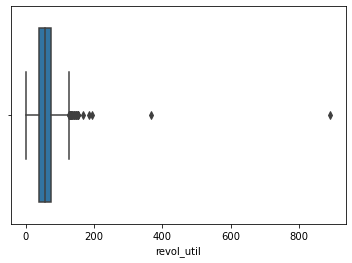

In [82]:
sns.boxplot(df['revol_util'])

-0.17612239697198262

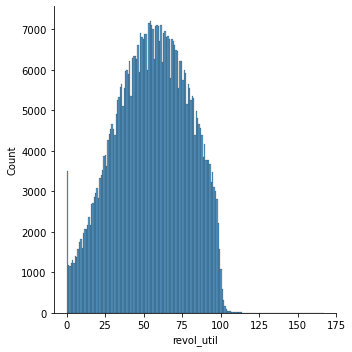

In [83]:
Q1 = df['revol_util'].quantile(0.25)

# calculate the third quartile
Q3 = df['revol_util'].quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1
df_new2 = df['revol_util'][~((df['revol_util'] < (Q1 - 3 * IQR)) | (df['revol_util'] > (Q3 + 3 * IQR)))]
sns.displot(df_new2)
df_new2.skew()


Inferences:-
After removal of the outliers the data is slightly skewed, but majority of the credit usages lies between 0 to 100k where the
mean credit usage is 65k but we will be retaining the outliers

## Column name: total_acc
* Total number of credit lines available in members credit line

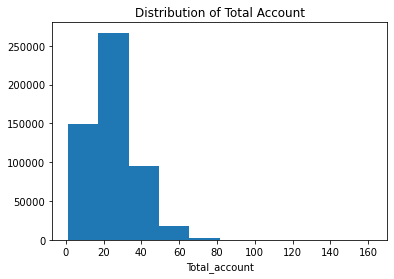

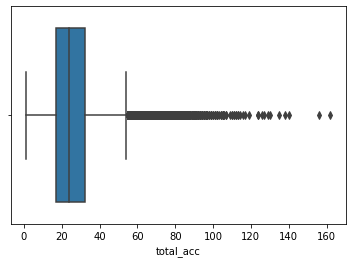

0.8931946471491778

In [17]:
plt.hist(df['total_acc'])
plt.xlabel('Total_account' , fontsize = 10)
plt.title('Distribution of Total Account')
plt.show()

sns.boxplot(df['total_acc'])
plt.show()

df['total_acc'].skew()


Inferences:-
Since the data indicates the number of total credit lines available for in members credit line
The range of credit lines lies between 1 to 162 but the maximum number lies between 1-60 where the median is around 24
The data also appears to be skewed to the right
After the removal of the outliers we can see that the data lies majorly between 0 to 50
The mean lies around 22-25 and iqr is between 15-30

## Column name: total_rec_int
* Interest received till date

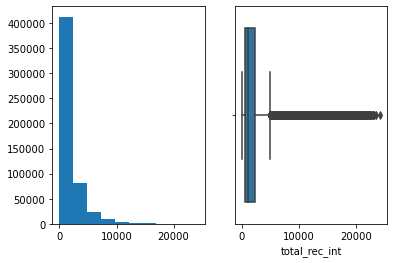

In [85]:
plt.subplot(1,2,1)
plt.hist(df['total_rec_int'])

df['total_acc'].skew()

plt.subplot(1,2,2)

sns.boxplot(df['total_rec_int'])
plt.show()


1.118183933109542

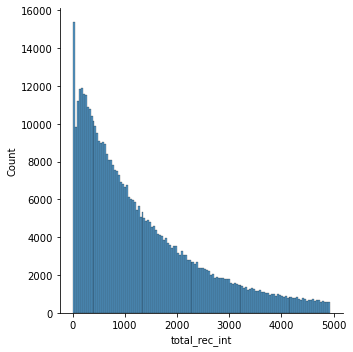

In [86]:
Q1 = df['total_rec_int'].quantile(0.25)

# calculate the third quartile
Q3 = df['total_rec_int'].quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1
df_new2 = df['total_rec_int'][~((df['total_rec_int'] < (Q1 - 1.5 * IQR)) | (df['total_rec_int'] > (Q3 + 1.5 * IQR)))]

sns.displot(df_new2)
df_new2.skew()


<AxesSubplot:>

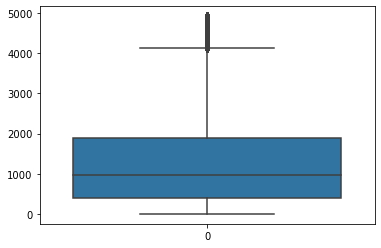

In [88]:
sns.boxplot(data = df_new2)

Inferences:-
The data also appears to be highly skewd to the right
The interest recived by the bank ranges between 0 to maxium of 24205
The highest number of interest recived lies between 0 to 2500 
The data contains a lot of outliers after 5000
After removal of the outliers we can see that the majority of the data lies between 200-1900 and the wisker range is between 0 - 4000

## Column name: total_rec_late_fee
* Late fee received till date

17.685835222946135

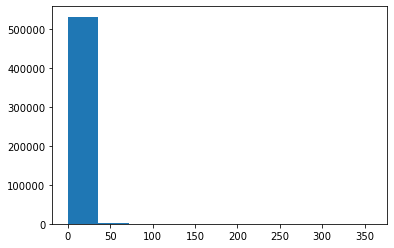

In [89]:
plt.hist(df['total_rec_late_fee']); 
df['total_rec_late_fee'].skew()


<AxesSubplot:>

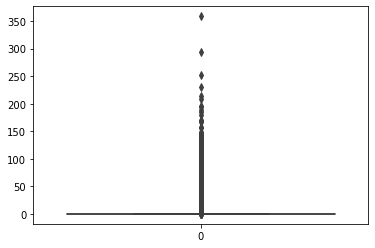

In [90]:
sns.boxplot(data = df['total_rec_late_fee'])

Inferences:-
The range of late fee lies between 0 - 358 but the majority of the late fee is 0
The outlier after zero to 350 

## Column name: recoveries
* Post charge off gross recovery

<AxesSubplot:>

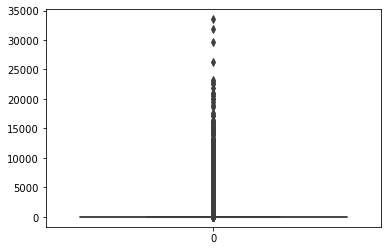

In [91]:
sns.boxplot(data = df['recoveries'])

Inferences:- 
Mostly the recoveries are zero i.e the people people pay their loan amount on time

## Column name:  collection_recovery_fee
* Post charge off collection fee

<AxesSubplot:>

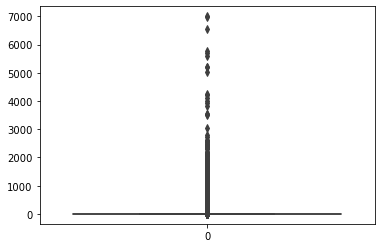

In [92]:
sns.boxplot(data = df['collection_recovery_fee']) 

Inferences:- Mostly the recoveries are zero i.e the people people pay their loan amount on time

## Column name: collections_12_mths_ex_med
* Number of collections in last 12 months excluding medical collections

15.760531493958498

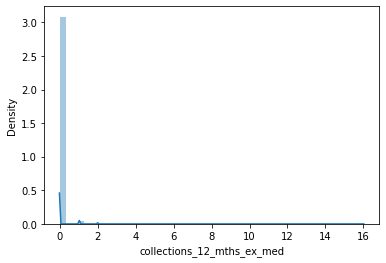

In [93]:
sns.distplot(df['collections_12_mths_ex_med'], kde=True); 
df['collections_12_mths_ex_med'].skew()


Inferences:- Number of collections in last 12 months excluding medical collections is mostly 0.

## Column name: mths_since_last_major_derog
* Months since most recent 90 day or worse rating

0.2658631199898654

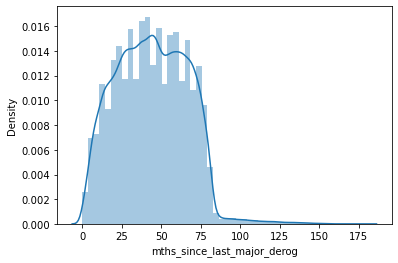

In [94]:
sns.distplot(df['mths_since_last_major_derog']); 
df['mths_since_last_major_derog'].skew()


Inferences:- Months since most recent 90 day or worse rating is majorily between 0 and 75 months.

## Column name: acc_now_delinq
* Number of accounts on which the member is delinquent

27.64041057953459

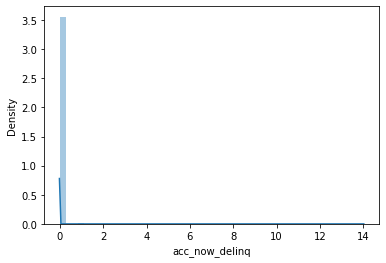

In [95]:
sns.distplot(df['acc_now_delinq']); 
df['acc_now_delinq'].skew() 

Inferences:- Most of the members pay on time and not default exists although there are a few outliers indicating that some people have a delay in their payment and their account have been marked 

## Column name:  tot_coll_amt

61.642206914496036

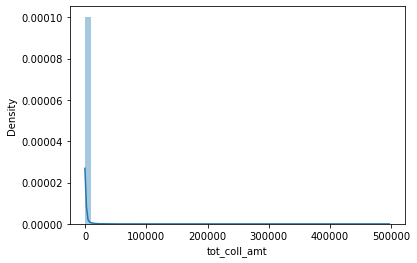

In [96]:
sns.distplot(df['tot_coll_amt']); 
df['tot_coll_amt'].skew() 

In [ ]:
Inferences:- Most of the data lies in zero which can be understood that people have yet to start to pay

## Column name: tot_cur_bal

3.0117547292258573

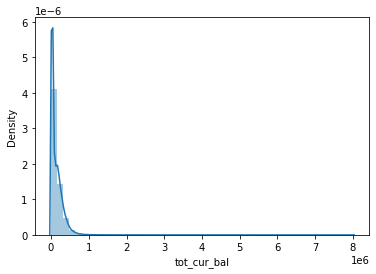

In [97]:
sns.distplot(df['tot_cur_bal']); 
df['tot_cur_bal'].skew()

In [ ]:
Inferences:- Most of the data lies between 0 and 1 that  people have yet to start to pay

## Column name: total_rev_hi_lim

In [1]:
sns.distplot(df['total_rev_hi_lim']); 
df['total_rev_hi_lim'].skew()

NameError: name 'sns' is not defined

In [ ]:
Inferences:- Most of the data lies between 0 and 0.2 that people have low creditid revolving limit

# Bivariate Analysis 

## Attributes : dti vs loan_status

Text(0.5, 0, 'Defaulter')

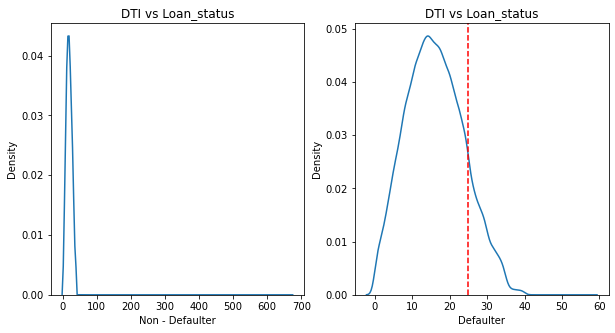

In [10]:
fig,ax = plt.subplots(nrows = 1,ncols= 2,figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(df.dti[df['loan_status'] == 0])
plt.xlabel('Non - Defaulter')
plt.title('DTI vs Loan_status')

plt.subplot(1,2,2)
sns.kdeplot(df.dti[df['loan_status'] == 1])
plt.axvline(25, color='r', linestyle='--', label="Threshold")
plt.title('DTI vs Loan_status')
plt.xlabel('Defaulter')


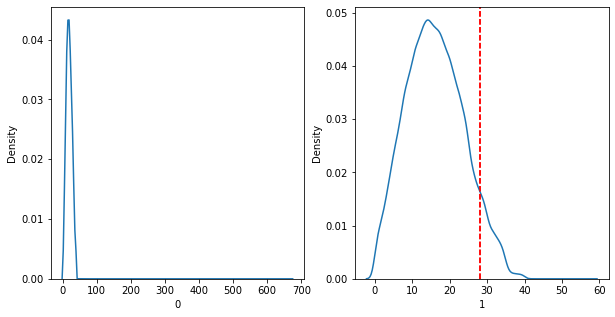

In [48]:
fig,ax = plt.subplots(nrows = 1,ncols= 2,figsize=(10,5))

for i,subplot in zip(range(2),ax.flatten()):
    z = sns.kdeplot(df.dti[df['loan_status'] == i], ax=subplot)
    z.set_xlabel(i)
    plt.axvline(28, color='r', linestyle='--', label="Threshold")

plt.show()

Inferences:-
Below graph shows two distribution of a non-defauler and a defaulter respectively
In both the cases we could see majority of the data lies in between the range of 0 to 40
In default graph we could se a lot of the member have ratios greater than 28 which could lead to rejection in loan

## Attributes : loan_status vs total_rev_hi_lim

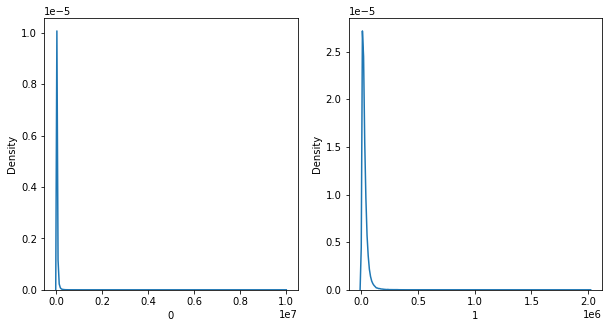

In [103]:
fig,ax = plt.subplots(nrows = 1,ncols= 2,figsize=(10,5))

for i,subplot in zip(range(2),ax.flatten()):
    z = sns.kdeplot(df.total_rev_hi_lim[df['loan_status'] == i], ax=subplot)
    z.set_xlabel(i)

plt.show()


Inferences:-
Below graph shows two distribution of a non-defauler and a defaulter respectively
In non-default we see a most of the density of the data is situated in the zero value
In default the area of density is more and has values greater than zero too.

## Attributes : loan_status vs tot_cur_bal

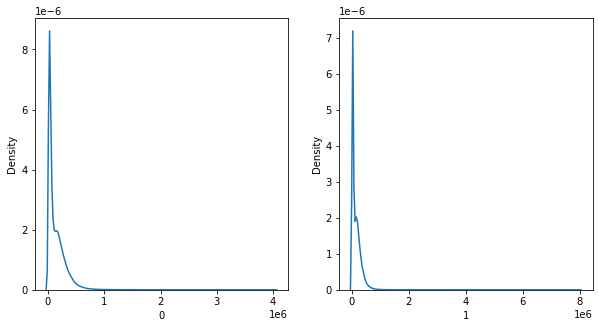

In [104]:
fig,ax = plt.subplots(nrows = 1,ncols= 2,figsize=(10,5))

for i,subplot in zip(range(2),ax.flatten()):
    z = sns.kdeplot(df.tot_cur_bal[df['loan_status'] == i], ax=subplot)
    z.set_xlabel(i)
#     plt.axvline(28, color='r', linestyle='--', label="Threshold")

plt.show()


Inferences:-
Below graph shows two distribution of a non-defauler and a defaulter respectively
In both the cases we could see majority of the data lies in the non-default data
In default graph we could se a lot of the member have zero values

## Attributes : Grade vs Loan_amnt (Hue : Term)

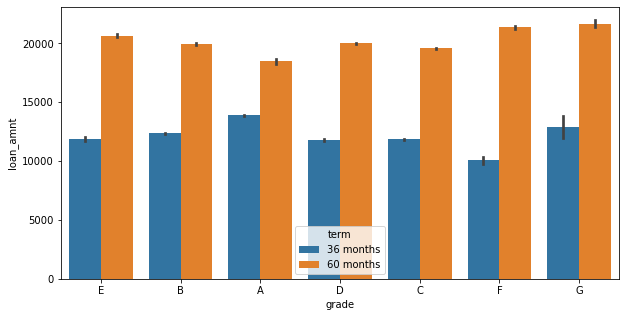

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(data = df, x='grade',y='loan_amnt',hue='term')
plt.show()


Inferences:- From the above plot, we can observe that maximum loan amount applied to the bank is around 60 months and this is assigned under Grade G.

## Attributes : Grade vs funded_amnt (Hue: Term)

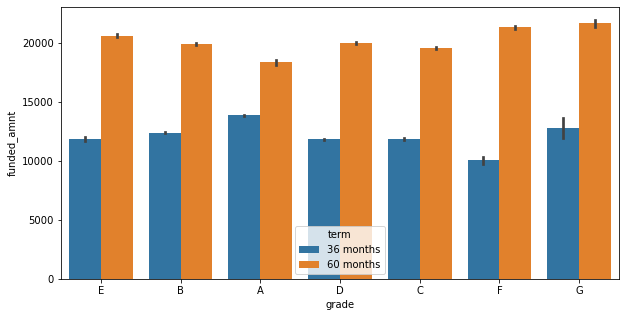

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(data = df, x='grade',y='funded_amnt',hue='term')
plt.show()


Inferences:- From the below plot, we can observe that maximum funded amount offered by the bank for the 60 months and it is also come under Grade G

## Attributes: loan_amnt vs funded_amnt (Hue : grade)

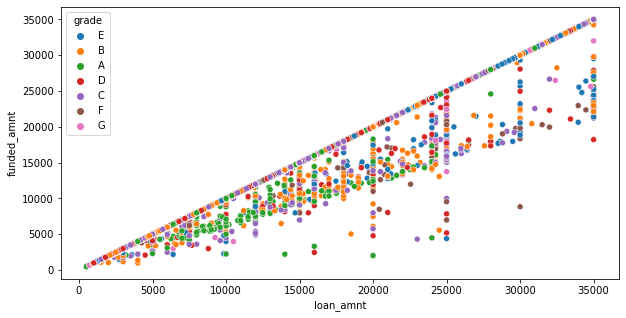

In [107]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x='loan_amnt',y='funded_amnt', hue='grade');
plt.show()


Inferences:-
From the below plot, we can observe that as the loan amount is increasing the funded amount is also increasing.
This is the directly proportion relation between them.

## Attributes: loan_amnt vs funded_amnt (Hue : term)

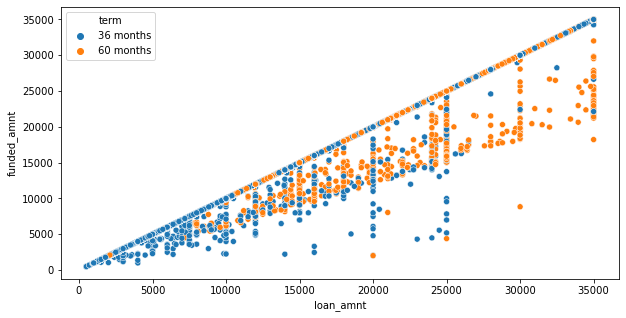

In [108]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x='loan_amnt',y='funded_amnt', hue='term');
plt.show()


In [ ]:
Inferences:-
From the below plot, we can observe that as the loan amount is increasing the funded amount is also increasing. 
This is the directly proportion relation between them.
When the loan_amount increases the number of default members also increases

## Attributes : int_rate vs grade

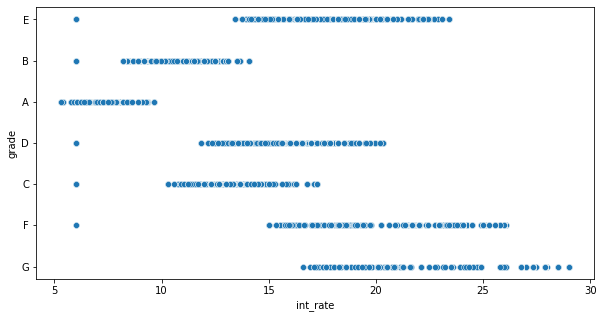

In [109]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x='int_rate',y='grade');
plt.show()


In [ ]:
Inferences:- From the below plot, we can observe that maximum interest rate is applicable for the Grade G.

## Attributes : funded_amnt_inv vs funded_amnt

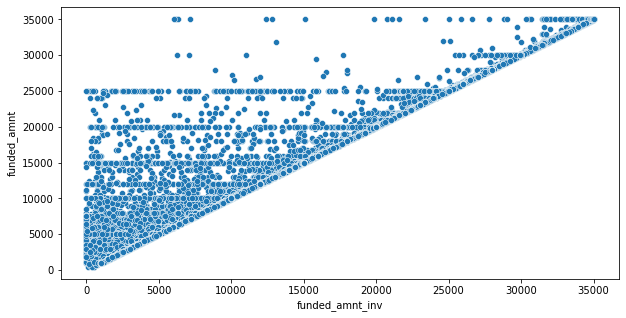

In [110]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x='funded_amnt_inv',y='funded_amnt');
plt.show()

Inferences:-
From the above plot, we can observe that Loan amount sanctioned by the bank is less or equal to the amount sanctioned by the investors.

## Attributes : home_ownership vs loan_amnt (Hue : term)

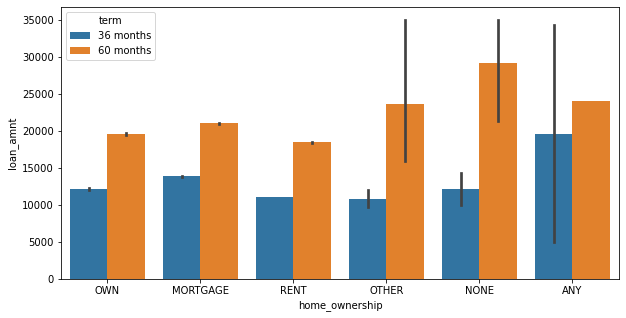

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(data = df, x='home_ownership',y='loan_amnt',hue='term')
plt.show()

Inferences:-
From the plot, we can observe that maximum loan amount (30000$) applied by the members whose ownership is categorised by 'None'. 
From the hist plot, the 'None' category home is very less.
Maximum members (around 50%) come under the "Mortgage" category who is applied  the loan amount around 21000$

## Attributes : emp_length vs loan_amnt (Hue : grade)

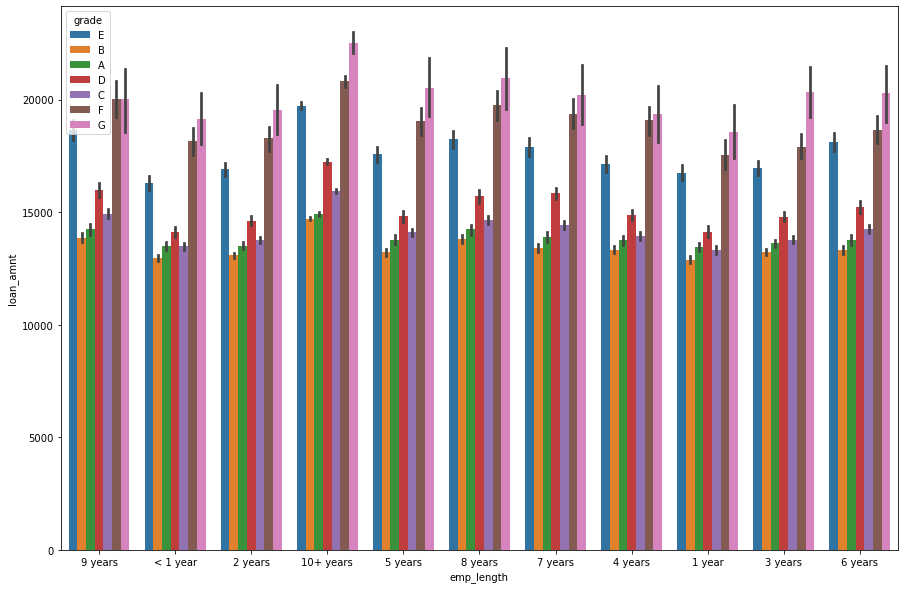

In [112]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x='emp_length',y='loan_amnt',hue='grade')
plt.show()

Inferences:-
From the below plot, we can observe that maximum loan amount offered by the member having exp more than 10 years and came under the Grade G

## Attributes : delinq_2yrs vs inq_last_6mths (hue : loan_status )

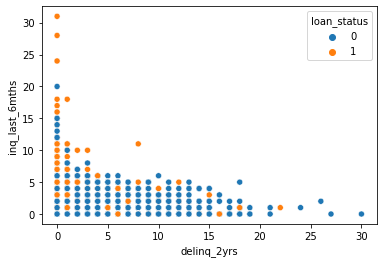

In [113]:
sns.scatterplot( x = df.delinq_2yrs,y = df.inq_last_6mths,hue = df.loan_status )
plt.show()

In [ ]:
Inferences:-
From the below plot we see that when the delinquency is zero the number of inquiries are more 
Although the delinquency is zero but due to the high number in inquiries we see a lot of default loan status

## Attributes : class_state vs grade 

In [7]:
dic = {'S': ['DE', 'MD', 'VA', 'WV' ,'KY', 'NC' ,'SC','TN' ,'GA', 'FL' ,'AL' ,'MS' ,'AR' , 'LA', 'TX', 'OK','DC' ], 
       'W': ['WA', 'MT' , 'OR' , 'ID' ,'WY' , 'NV' ,'UT' ,'CO' ,'CA', 'AZ','NM', 'HI', 'AK' ],
       'MW' : ['ND','MN' , 'SD' ,'NE' ,'IA' ,'KS' , 'MO' , 'WI' , 'IL' , 'IN' ,'OH' ,'MI'],
       'NE' : ['PA', 'UT' ,'NH', 'ME','MA', 'RI' ,'CT' ,'NJ','NY','VT']}
rep_df = []
for i in df['addr_state']:
    for j,k in dic.items():
        if i in k:
            rep_df.append(j)
            break

            
            
df['class_state'] = rep_df
df['class_state'].value_counts() 

S     188675
W     140673
NE    110127
MW     92953
Name: class_state, dtype: int64

Text(0.5, 1.0, 'Distribution of states')

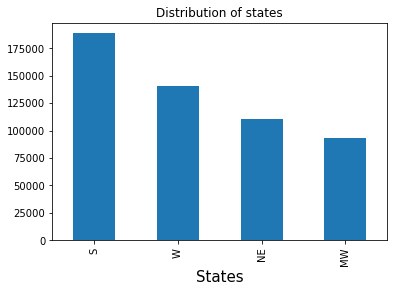

In [8]:
df['class_state'].value_counts().plot(kind = 'bar')
plt.xlabel('States',fontsize = 15)
plt.title('Distribution of states')

<AxesSubplot:xlabel='class_state'>

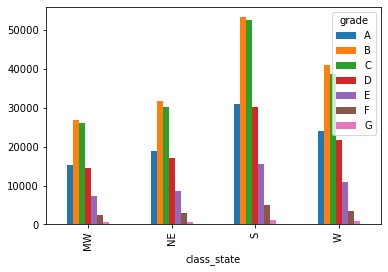

In [9]:
pd.crosstab(df['class_state'] , df['grade']).plot(kind = 'bar')

Inferences:- From the above plot, we can observe that the ratio of all the grade in every state is almost same

## Attributes : class_state vs loan_amnt (hue : loan_status )

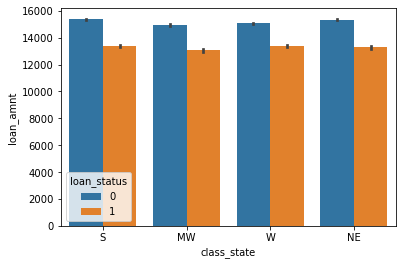

In [10]:
sns.barplot(x = df['class_state'] , y = df.loan_amnt , hue = df['loan_status'])
plt.show()


Inferences:- From the above plot, we can observe that every state has a equal average and a equal non-default to default ratio

## Attributes : total_acc vs loan_status

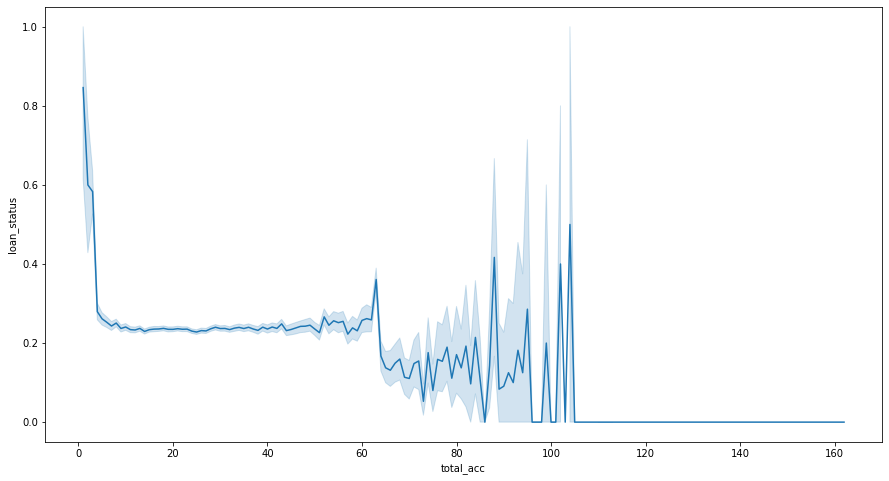

In [11]:
plt.figure(figsize=(15,8))
sns.lineplot(x =df['total_acc'] ,y = df['loan_status'])
plt.show()


## Attributes : recoveries vs loan_status 

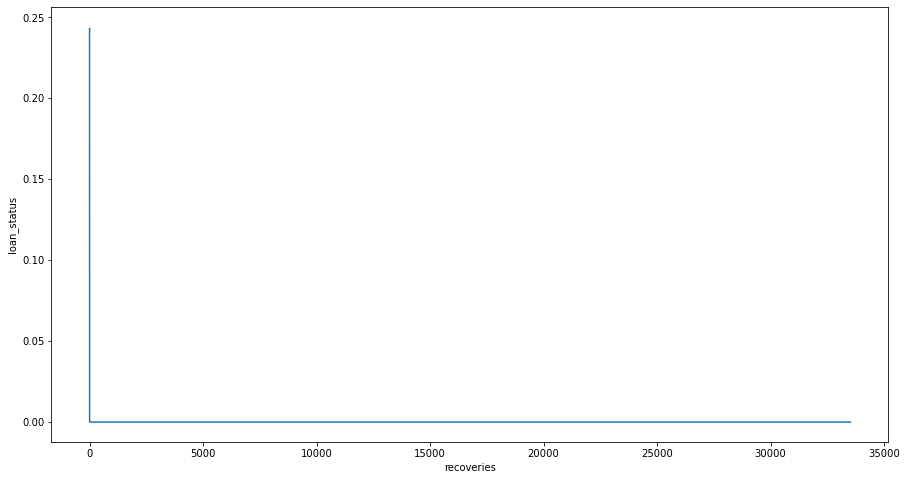

In [12]:
plt.figure(figsize=(15,8))
sns.lineplot(df['recoveries'] ,df ['loan_status']) 
plt.show()

Inferences:- From the above plot, we can observe that L graph this indicates that most of the values lie on zero and the there exists outliers

## Attributes : ['total_rec_int'] vs ['loan_amnt']


KeyboardInterrupt



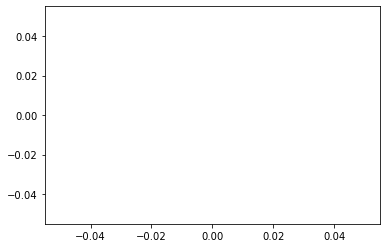

In [13]:
sns.lineplot(x=df.total_rec_int,y=df.loan_amnt)
 
sns.lmplot(data=df,y='total_rec_int' ,x='loan_amnt')

plt.show()

Inferences:- From the above plot, we can observe that triangle based filled graph indicating with total_rec_int increase there is decrease in loan amount

## Attributes : ['total_acc'] vs ['tot_cur_bal']

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df['total_acc'] ,df['tot_cur_bal'])
plt.show()


Inferences:- From the above plot, we can observe that as the total number of credit lines is increase then the loan status decreases

## Attributes :  ['total_acc']  vs ['open_acc'] 
                  

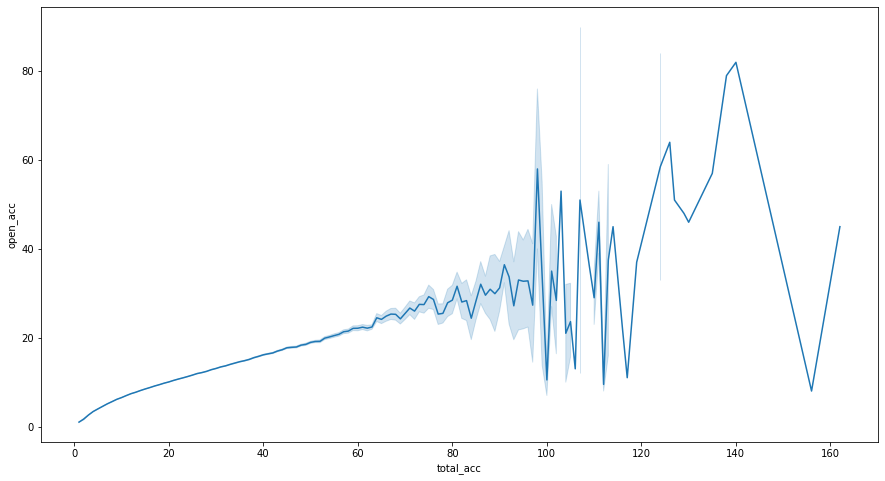

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(df['total_acc'] ,df['open_acc'])
plt.show()


Inferences:- From the above plot, we can observe that interest rate increase with increase in amount of credit i.e. linear
The open acc increases with increase in total_acc and total_rec_int

## Attributes : ['total_acc'] vs ['loan_amnt']

<AxesSubplot:xlabel='total_acc', ylabel='loan_amnt'>

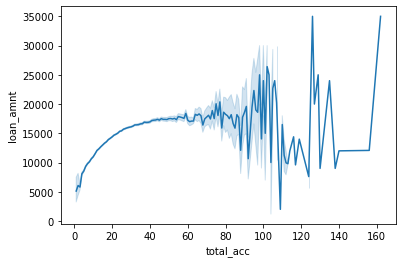

In [36]:

sns.lineplot(x=df.total_acc,y=df.loan_amnt)  

inference: intially there is a exponetial change and then it hits a plateau

## Attributes : ['total_acc'] vs ['annual_inc'] 

In [ ]:
plt.figure(figsize=(15,8))

sns.lineplot(df['total_acc'] ,df['annual_inc']) 
Plt.show()

Inferences:- From the above plot, we can observe that annual_inc increases with increase in total_acc once total_acc reaches 80 it begins to drop

## Attributes : ['total_acc'] vs ['dti']  & ['tot_cur_bal']

<AxesSubplot:xlabel='total_acc', ylabel='dti'>

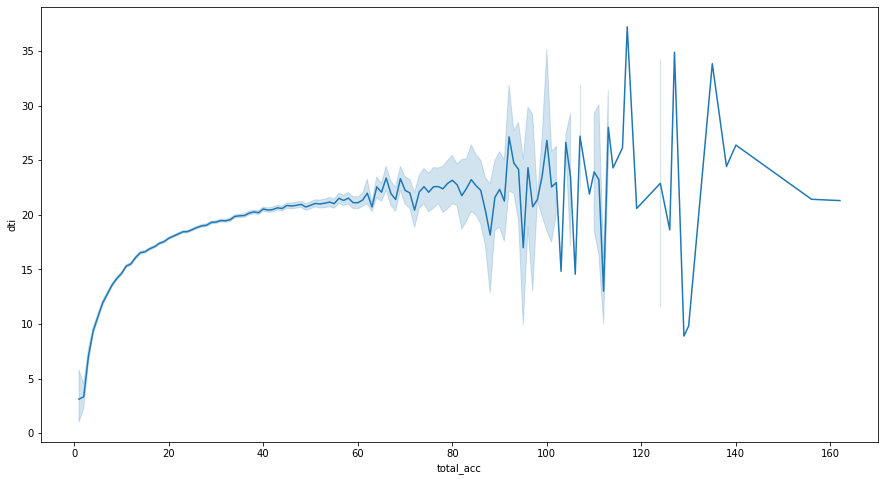

In [46]:
plt.figure(figsize=(15,8))

sns.lineplot(df['total_acc'] ,df['dti'])
plt.show()

<AxesSubplot:xlabel='total_acc', ylabel='tot_cur_bal'>

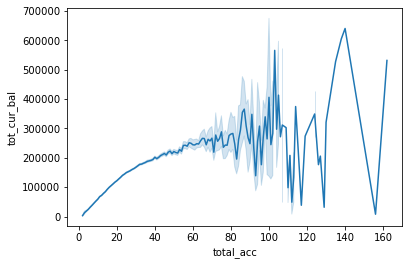

In [45]:
sns.lineplot(df['total_acc'] ,df['tot_cur_bal'])

Inferences:- From the above plot, we can observe that intially there is a exponetial change and then it hits a plateau around 40

### Attributes : ['total_acc'] vs ['inq_last_6mths'],['mths_since_last_delinq'],['mths_since_last_record']

<AxesSubplot:xlabel='total_acc', ylabel='inq_last_6mths'>

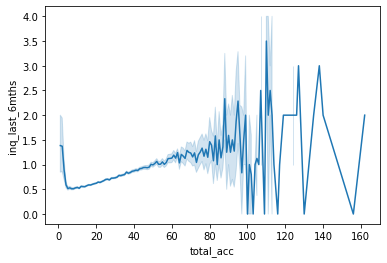

In [39]:
sns.lineplot(df['total_acc'] ,df['inq_last_6mths']) 


In [ ]:
Inferences:- From the above plot, we can observe that there was sudden drop and after that growth is slow

<AxesSubplot:xlabel='total_acc', ylabel='mths_since_last_delinq'>

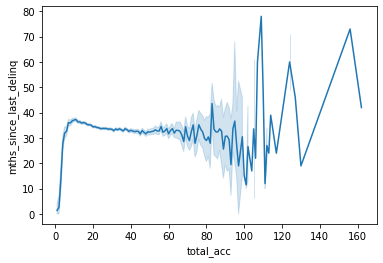

In [40]:
sns.lineplot(df['total_acc'] ,df['mths_since_last_delinq'])

Inferences:- From the above plot, we can observe that as total_acc increases the mths_since_last_delinq is also increases and then hits a plateau

<AxesSubplot:xlabel='total_acc', ylabel='mths_since_last_record'>

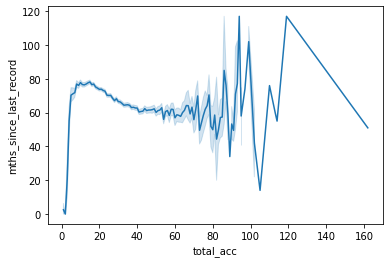

In [41]:
sns.lineplot(df['total_acc'] ,df['mths_since_last_record'])

Inferences:- From the above plot, we can observe that as total_acc increases the mths_since_last_record is also increases and then hits a plateau

## Attributes : ['recoveries'] vs ['collection_recovery_fee']

<AxesSubplot:xlabel='recoveries', ylabel='collection_recovery_fee'>

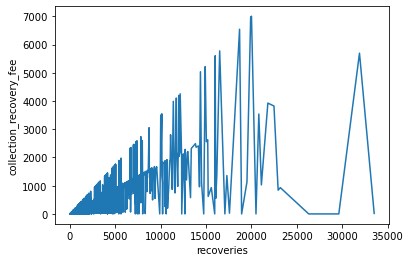

In [119]:
sns.lineplot(df['recoveries'] ,df['collection_recovery_fee']) 

Inferences:- From the above plot shows as linear vague line.

## Attributes : ['initial_list_status'] vs ['collections_12_mths_ex_med']

<AxesSubplot:xlabel='initial_list_status', ylabel='collections_12_mths_ex_med'>

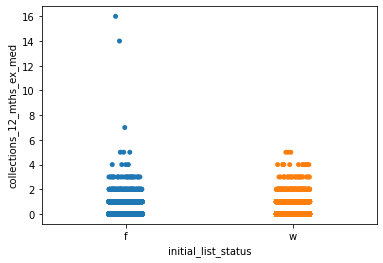

In [121]:
sns.stripplot(df['initial_list_status'] ,df['collections_12_mths_ex_med']) 

In [ ]:
Inferences:- From the above plot, we can observe that striplot is descrete to values

## HEAT MAP Correlation 

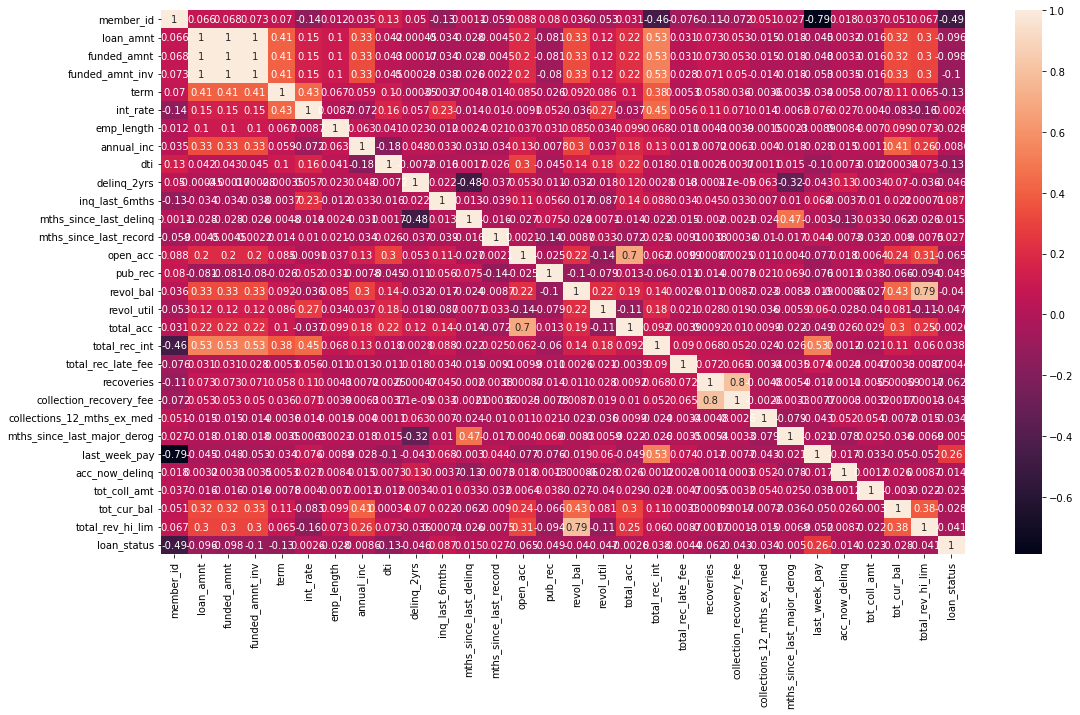

In [59]:
plt.figure(figsize=(18,10))
sns.heatmap(data=df.corr(),annot=True)
plt.show()


Inferences :

1.Member_id has a very weak negative correlation with loan_status.

2.funded_amnt,funded_amnt_inv are perfectly positively correlated with loan_amnt.

3.similarly funded_amnt,funded_amnt_inv,loan_amnt are perfectly positively correlated to each other.

4.last_week_pay has a significant negative correlation with member_id.

5.total_acc has a significant positive correlation with open_acc.

6.total_rev_hi_lim has a significant positive correlation with revol_bal.

7.collection_recovery_fee has a significant positive correlation with recoveries.

8.total_rec_int has a weak positive correlation with loan_amnt,funded_amnt,funded_amnt_inv,last_week_pay columns.

9.mths_since_last_dealing has weak negative correlation with delinq_2yrs.

10.member_id has weak negative correlation with total_rec_int columns.

11.mths_since_last_major_derog has weak positive relation with mths_since_last_delinq.

12.tot_cur_bal has very weak positive relation with annual_inc.

# Data Preprocessing

## Handling Missing/Null Values

In [14]:
df1 = df.copy()
print(df1.shape)

(532428, 46)


1. verification_status_joint (% of null values is 99.92) 

2.  application_type  (biased towards the category 'individual')

3. mths_since_last_major_derog (mths_since_last_delinq and mths_since_last_major_derog have similar values and 
                               
   mths_since_last_major_derog null values % is 75% so the overall significant data is 10.28% only )       

4.  pymnt_plan (biased towards the category 'no')

5. desc (cant be used --sentence) 

6. zip_code  (Zip codes cant be converted or used due to extermly large number of unique values 
   instead we converted the addr_state) 

7.  batch_enrolled (too many unique categories) 

8.  member_id (unique values)

9. emp_title  (too many categories and some of them are not relevant)   

10. title (too many catergories and many irrelevant data )

11. mths_since_last_record (84.57% of null values)

In [15]:
df1 = df1.drop(['verification_status_joint','application_type','mths_since_last_major_derog','pymnt_plan','desc',
                'zip_code','batch_enrolled','member_id','emp_title','title','mths_since_last_record'] , axis = 1)


In [16]:
df1 = df1.drop(['home_ownership','purpose'],axis =1)

In [17]:
df1 = df1.dropna(subset=['delinq_2yrs'])

## Encoding

In [18]:
LE = LabelEncoder()
df1['term'] = LE.fit_transform(df1['term'])



In [19]:
df1['last_week_pay'] = df1['last_week_pay'].replace('NAth week',None)
df1['last_week_pay'] = df1['last_week_pay'].fillna('0') # filling the null values with 0's
df1['last_week_pay'] = df1['last_week_pay'].str.extract('(\d+)') # Extract the numerical value in the string
df1['last_week_pay'] = df1['last_week_pay'].astype(int) # converting string to integer

In [20]:
dict = {'10+ years' : 10,
        '2 years'   : 2 ,
        '< 1 year'  : 0 ,
        '3 years'   : 3 ,
        '1 year'    : 1 ,
        '5 years'   : 5 ,
        '4 years'   : 4 ,
        '7 years'   : 7 ,
        '8 years'   : 8 ,
        '6 years'   : 6 ,
        '9 years'   : 9 }

df1['emp_length'] = df1.emp_length.map(dict) # converting the emp expiernce to numerical 
df1['emp_length'] = df1['emp_length'].fillna('0') # filling the null values with 0's
df1['emp_length'] = df1['emp_length'].astype(int)

In [21]:
# Classification of Address State
dic = {'S': ['DE', 'MD', 'VA', 'WV' ,'KY', 'NC' ,'SC','TN' ,'GA', 'FL' ,'AL' ,'MS' ,'AR' , 'LA', 'TX', 'OK','DC' ], 
       'W': ['WA', 'MT' , 'OR' , 'ID' ,'WY' , 'NV' ,'UT' ,'CO' ,'CA', 'AZ','NM', 'HI', 'AK' ],
       'MW' : ['ND','MN' , 'SD' ,'NE' ,'IA' ,'KS' , 'MO' , 'WI' , 'IL' , 'IN' ,'OH' ,'MI'],
       'NE' : ['PA', 'UT' ,'NH', 'ME','MA', 'RI' ,'CT' ,'NJ','NY','VT']}
# Dictionary for classifying regions according to their states

rep_df1 = []
for i in df1['addr_state']:
    for j,k in dic.items():
        if i in k:
            rep_df1.append(j)
            break
 
df1['addr_state'] = rep_df1

In [22]:
char = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
    
for i ,j in zip(char , range(1,8)):
    df1['grade'].replace(i,j , regex = True , inplace = True)

df1['num'] = df1['sub_grade'].str[1] 
df1['num'] = df1['num'].astype(int)
rep = {5:1 , 4:2 ,3:3 ,2:4 , 1:5}
df1['num_inv'] = df1['num'].map(rep)
df1['grade_num'] = df1['grade'].astype(str) + df1['num_inv'].astype(str)
df1['grade_num'] = df1['grade_num'].astype(int)

df1 = df1.drop(['num','num_inv','grade','sub_grade'] , axis = 1)


# Converting the subgrades as :- 
                                    # A1,A2,A3,A4,A5 ------> 75,74,73,72,71
                                    # B1,B2,B3,B4,B5 ------> 65,64,63,62,61
                                    # C1,C2,C3,C4,C5 ------> 55,54,53,52,51
                                    # D1,D2,D3,D4,D5 ------> 45,44,43,42,41
                                    # E1,E2,E3,E4,E5 ------> 35,34,33,32,31
                                    # F1,F2,F3,F4,F5 ------> 25,24,23,22,21
                                    # G1,G2,G3,G4,G5 ------> 15,14,13,12,11

# respectively

In [23]:
df1['initial_list_status'] = LE.fit_transform(df1['initial_list_status'])

In [24]:
df1["verification_status"] = df1["verification_status"].replace('Source Verified','Verified')
df1['verification_status'] = LE.fit_transform(df1['verification_status'])

In [25]:
df1['revol_util'] = df1['revol_util'].fillna(df1['revol_util'].median()) 
# revol_util the columns had 287 nulls and the data had high kurtosis so it was decide  
# to take median sine it wont affect the 5 lakh data set
df1['collections_12_mths_ex_med'] = df1['collections_12_mths_ex_med'].fillna(df1['collections_12_mths_ex_med'].median())
# collections_12_mths_ex_med majority of it was around 0,so median seemed ideal

In [26]:
df1['mths_since_last_delinq'] = df1['mths_since_last_delinq'].fillna(0)
# converting the null values to 0 

In [27]:
df1['tot_coll_amt'] = df1['tot_coll_amt'].fillna(df1['tot_coll_amt'].median())
df1['tot_cur_bal'] = df1['tot_cur_bal'].fillna(df1['tot_cur_bal'].median())
df1['total_rev_hi_lim'] = df1['total_rev_hi_lim'].fillna(df1['total_rev_hi_lim'].median())

In [28]:
percent = pd.DataFrame(data = (df.isnull().sum()/len(df))*100, columns=['Before'])
percent['After'] = df1.isnull().sum() / len(df1) * 100
percent # Shows the perecentage of null values in the dataset.
# The NaN Values in the After column are the dropped column

,Before,After
member_id,0.000000,NaN
loan_amnt,0.000000,0.0
funded_amnt,0.000000,0.0
funded_amnt_inv,0.000000,0.0
term,0.000000,0.0
batch_enrolled,15.992585,NaN
int_rate,0.000000,0.0
grade,0.000000,NaN
sub_grade,0.000000,NaN
emp_title,5.791018,NaN


In [36]:
df1 = pd.get_dummies(data = df1 , columns = ['addr_state'],drop_first = True)

KeyError: "None of [Index(['addr_state'], dtype='object')] are in the [columns]"

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532412 entries, 0 to 532427
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   532412 non-null  int64  
 1   funded_amnt                 532412 non-null  int64  
 2   funded_amnt_inv             532412 non-null  float64
 3   term                        532412 non-null  int32  
 4   int_rate                    532412 non-null  float64
 5   emp_length                  532412 non-null  int32  
 6   annual_inc                  532412 non-null  float64
 7   verification_status         532412 non-null  int32  
 8   dti                         532412 non-null  float64
 9   delinq_2yrs                 532412 non-null  float64
 10  inq_last_6mths              532412 non-null  float64
 11  mths_since_last_delinq      532412 non-null  float64
 12  open_acc                    532412 non-null  float64
 13  pub_rec       

In [31]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,class_state,grade_num,addr_state_NE,addr_state_S,addr_state_W
0,14350,14350,14350.0,0,19.19,9,28700.0,1,33.88,0.0,1.0,50.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,26,0.0,0.0,28699.0,30800.0,0,S,33,0,1,0
1,4800,4800,4800.0,0,10.99,0,65000.0,1,3.64,0.0,1.0,0.0,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,9,0.0,0.0,9974.0,32900.0,0,S,62,0,1,0
2,10000,10000,10000.0,0,7.26,2,45000.0,0,18.42,0.0,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,9,0.0,65.0,38295.0,34900.0,0,MW,72,0,0,0
3,15000,15000,15000.0,0,19.72,10,105000.0,0,14.97,0.0,2.0,46.0,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,135,0.0,0.0,55564.0,24700.0,0,S,41,0,1,0
4,16000,16000,16000.0,0,10.64,10,52000.0,1,20.16,0.0,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,96,0.0,0.0,47159.0,47033.0,0,W,64,0,0,1


# Model Building

In [32]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [33]:
X = df1.drop(['loan_status'],axis =1)
y = df1['loan_status']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 10, test_size = 0.2)

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

ValueError: could not convert string to float: 'W'

The Accuracy of the model comes out to be :- 76.32%

In [ ]:
X_train = sm.add_constant(X_train)
logreg = sm.Logit(y_train , X_train).fit()
print(logreg.summary())

In [ ]:
X = sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 10, test_size = 0.2)

In [ ]:
logreg = sm.Logit(y_train , X_train).fit()
print(logreg.summary())

In [ ]:
y_pred_proba = logreg.predict(X_test)

y_pred = [0 if i < 0.5 else 1 for i in y_pred_proba]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["Features"] = X.columns
print(vif) 
##according to vif method the highest vif value column
#has to be dropped to reduce multicolinearity

     VIF_Factor                    Features
0   2853.425825                   loan_amnt
1   4166.595746                 funded_amnt
2   1062.448461             funded_amnt_inv
3      2.244156                        term
4     15.178489                    int_rate
5      3.365072                  emp_length
6      3.194044                  annual_inc
7      3.797216         verification_status
8      7.464919                         dti
9      1.215299                 delinq_2yrs
10     1.713071              inq_last_6mths
11     1.614356      mths_since_last_delinq
12    12.511202                    open_acc
13     1.169216                     pub_rec
14     5.953492                   revol_bal
15     9.698877                  revol_util
16    12.106110                   total_acc
17     2.287486         initial_list_status
18     5.849052               total_rec_int
19     1.028097          total_rec_late_fee
20     2.858339                  recoveries
21     2.808631     collection_r

In [157]:
df1.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
emp_length                    0
annual_inc                    0
verification_status           0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
last_week_pay                 0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
loan_status                   0
grade_num                     0
dtype: i

In [169]:
df_num = df1.select_dtypes(exclude = 'object')
df_cat = df1.select_dtypes(include = 'object')

In [170]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)

In [171]:
df_num = pd.DataFrame(num_scaled,columns = df_num.columns)


In [172]:
X = pd.concat([df_num , df_cat], axis = 1)

In [174]:
X = X.dropna(axis = 0)

In [181]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_num,term,verification_status,initial_list_status,addr_state_NE,addr_state_S,addr_state_W
0,-0.048364,-0.046814,-0.042097,1.357864,0.865087,-0.710585,1.880871,-0.365619,0.306308,1.458701,0.462098,1.379088,0.249437,0.756576,0.230735,-0.276907,-0.096546,-0.111593,-0.076976,-0.107502,-0.693445,-0.063386,-0.104603,-0.714885,-0.016934,-0.556265,-1.700245,0,1,0,0,1,0
1,-1.180641,-1.179801,-1.173471,-0.514449,-1.499322,-0.153837,-1.732488,-0.365619,0.306308,-0.726478,-1.044085,-0.333764,-0.414648,-1.335900,-1.035814,-0.797584,-0.096546,-0.111593,-0.076976,-0.107502,-1.074465,-0.063386,-0.104603,-0.840919,0.040456,-0.556265,0.534961,0,1,1,0,1,0
2,-0.564113,-0.562887,-0.557435,-1.366123,-0.973898,-0.460585,0.033565,-0.365619,-0.696676,-0.726478,-1.232358,-0.333764,-0.269576,-1.000433,-0.529195,-0.810712,-0.096546,-0.111593,-0.076976,-0.107502,-1.074465,-0.063386,-0.070040,-0.650296,0.095114,-0.556265,1.305721,0,0,1,0,0,0
3,0.028702,0.030301,0.034908,1.478880,1.127799,0.459659,-0.378673,-0.365619,1.309293,1.283887,-0.290994,-0.333764,-0.143145,0.018548,-0.360321,1.483436,-0.096546,-0.111593,-0.076976,-0.107502,1.749569,-0.063386,-0.104603,-0.534063,-0.183640,-0.556265,-1.083637,0,0,0,0,1,0
4,0.147265,0.148938,0.153376,-0.594365,1.127799,-0.353223,0.241477,-0.365619,-0.696676,-0.726478,-0.102721,-0.333764,0.843461,0.886569,0.146299,0.259382,-0.096546,-0.111593,-0.076976,-0.107502,0.875463,-0.063386,-0.104603,-0.590635,0.426694,-0.556265,0.689113,0,2,1,0,0,1


In [177]:
LE = LabelEncoder()
X['term'] = LE.fit_transform(X['term'])


In [178]:
X['verification_status'] = LE.fit_transform(X['verification_status'])

In [179]:
X['initial_list_status'] = LE.fit_transform(X['initial_list_status'])

In [180]:
X = pd.get_dummies(data = X , columns = ['addr_state'], drop_first = True)

In [ ]:
X = X.drop(['loan_status'],axis = 1)

In [186]:
X.shape

(532396, 32)

In [187]:
y = df.loan_status

0

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 10, test_size = 0.2)

In [120]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (425942, 32)
y_train (425942,)
X_test (106486, 32)
y_test (106486,)


<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

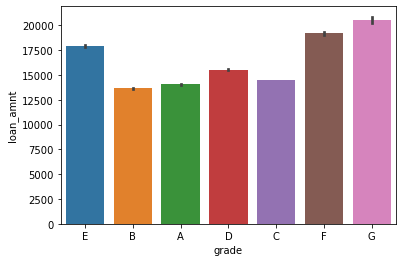

In [11]:
sns.barplot(x = df.grade , y = df.loan_amnt)

In [12]:
df.grade.value_counts()

B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

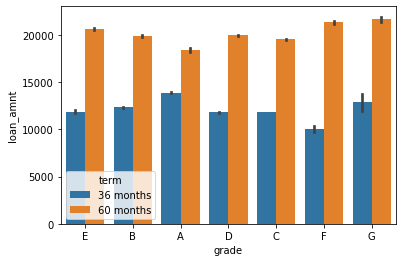

In [14]:
sns.barplot(x = df.grade , y = df.loan_amnt , hue = df.term)

In [9]:
df_num = df.select_dtypes(np.number)
df_num.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,19.19,28700.0,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,74.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,10.99,65000.0,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,NaN,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,7.26,45000.0,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,NaN,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,19.72,105000.0,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,NaN,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,10.64,52000.0,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,NaN,0.0,0.0,47159.0,47033.0,0


In [10]:
df_num = df_num.drop('loan_status' , axis = 1)

In [12]:
df_num = df_num.drop('member_id' , axis = 1)

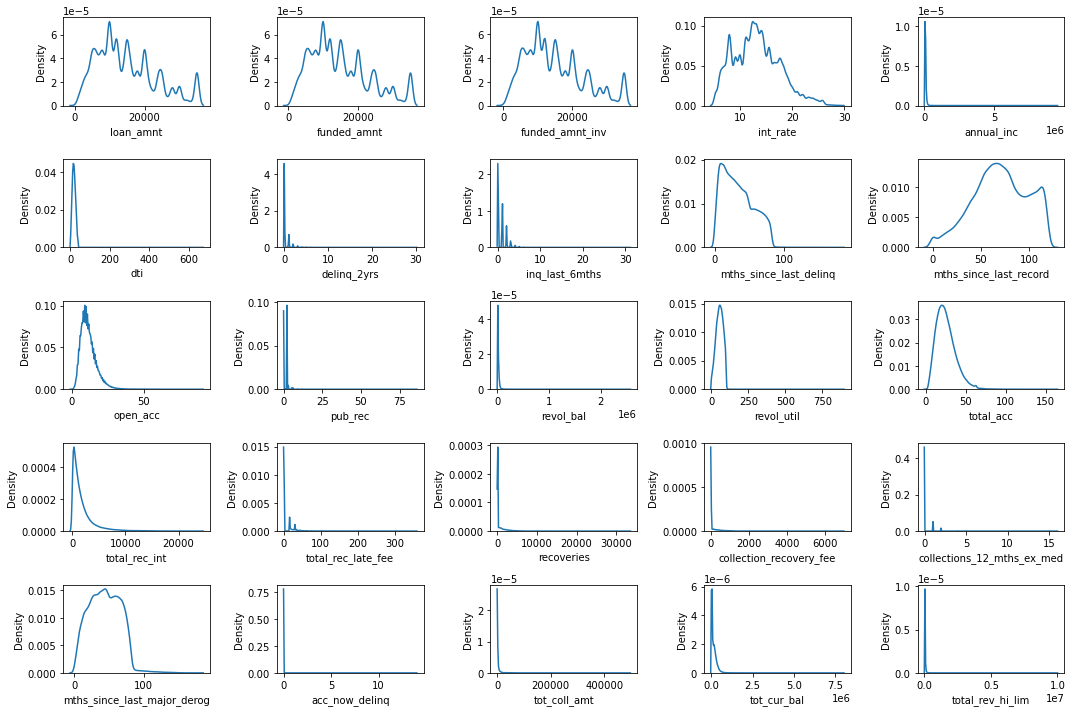

In [13]:
fig,ax = plt.subplots(5,5, figsize = (15,10))

for i , j in zip(df_num.columns , ax.flatten()):
    kde = sns.kdeplot(df_num[i] , ax = j)
    
plt.tight_layout()   
plt.show()